
<p style="font-size:21px; font-family:'Times New Roman';">
Read report dates data 
</p>

In [1]:
import pandas as pd
import numpy as np
csv_file_path = '/Users/balmeru/Downloads/QQQQ.csv'
df = pd.read_csv(csv_file_path)


In [2]:
df.head()

,GVKEY,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,ibq,lseq,ltq,pstkq,teqq,txdbq,dvpy,costat,mkvaltq,prccq
0,1000,1975-06-30,1975,2,12,INDL,C,D,STD,AE.2,...,0.875,NaN,NaN,0.414,NaN,NaN,NaN,I,NaN,2.875
1,1000,1975-09-30,1975,3,12,INDL,C,D,STD,AE.2,...,0.613,NaN,NaN,0.414,NaN,NaN,NaN,I,NaN,4.000
2,1000,1975-12-31,1975,4,12,INDL,C,D,STD,AE.2,...,0.606,23.905,11.596,2.069,NaN,NaN,NaN,I,NaN,4.375
3,1000,1976-03-31,1976,1,12,INDL,C,D,STD,AE.2,...,0.726,32.531,19.469,2.069,NaN,NaN,0.031,I,NaN,6.750
4,1000,1976-06-30,1976,2,12,INDL,C,D,STD,AE.2,...,1.603,35.157,20.287,2.069,NaN,NaN,NaN,I,NaN,7.250


In [3]:
df['market_cap'] = df['prccq'] / df['ajexq'] * df['cshoq']


In [4]:
print(df[['prccq', 'ajexq', 'cshoq', 'market_cap']].head())


   prccq  ajexq  cshoq  market_cap
0  2.875    1.0  2.092     6.01450
1  4.000    1.0  2.094     8.37600
2  4.375    1.0  2.098     9.17875
3  6.750    1.0  2.096    14.14800
4  7.250    1.0  2.163    15.68175


In [5]:
non_empty_market_cap_count = df['market_cap'].notna().sum()

print(f"Number of non-empty market_cap rows: {non_empty_market_cap_count}")


Number of non-empty market_cap rows: 1014935


In [6]:
num_rows = df.shape[0]

print(f"The number of rows in the CSV file is: {num_rows}")


The number of rows in the CSV file is: 1085915


In [7]:
# Calculate upper and lower bounds
df['lower_bound'] = 0.8 * df['market_cap']
df['upper_bound'] = 1.2 * df['market_cap']
print(df[['market_cap', 'lower_bound', 'upper_bound']])


            market_cap    lower_bound    upper_bound
0             6.014500       4.811600       7.217400
1             8.376000       6.700800      10.051200
2             9.178750       7.343000      11.014500
3            14.148000      11.318400      16.977600
4            15.681750      12.545400      18.818100
...                ...            ...            ...
1085910      98.553000      78.842400     118.263600
1085911    1761.430000    1409.144000    2113.716000
1085912    2049.070400    1639.256320    2458.884480
1085913  321206.432121  256965.145697  385447.718545
1085914  292932.029293  234345.623435  351518.435152

[1085915 rows x 3 columns]


In [8]:
df['quarterly_report'] = (df['fqtr'].isin([1, 2, 3])).astype(int)
df['annual_report'] = (df['fqtr'] == 4).astype(int)
print(df[['fqtr', 'quarterly_report', 'annual_report']])



         fqtr  quarterly_report  annual_report
0           2                 1              0
1           3                 1              0
2           4                 0              1
3           1                 1              0
4           2                 1              0
...       ...               ...            ...
1085910     1                 1              0
1085911     4                 0              1
1085912     1                 1              0
1085913     4                 0              1
1085914     1                 1              0

[1085915 rows x 3 columns]


In [9]:
df['fyr'] = pd.to_numeric(df['fyr'], errors='coerce')
df = df.sort_values(by=['tic', 'fyearq', 'fqtr'])
ticker_change = df['tic'] != df['tic'].shift(1)
df['fyr_change_dummy'] = ((df['fyr'] != df['fyr'].shift(1)) & (~ticker_change)).astype(int)

# Fill the first occurrence of each ticker group with 0
df.loc[df.groupby('tic').head(1).index, 'fyr_change_dummy'] = 0


In [10]:
print(df[['tic', 'rdq', 'fyearq', 'fqtr', 'fyr', 'fyr_change_dummy']].head(60))


         tic         rdq  fyearq  fqtr  fyr  fyr_change_dummy
60380  0015B         NaN    1983     3   10                 0
60381  0015B  1984-01-16    1983     4   10                 0
60382  0015B  1984-03-15    1984     1   10                 0
60383  0015B  1984-05-25    1984     2   10                 0
60384  0015B  1984-08-27    1984     3   10                 0
60385  0015B  1985-01-01    1984     4   10                 0
60386  0015B  1985-03-05    1985     1   10                 0
60387  0015B  1985-06-17    1985     2   10                 0
60388  0015B  1985-09-09    1985     3   10                 0
60389  0015B  1986-01-06    1985     4   10                 0
60390  0015B  1986-03-06    1986     1   10                 0
60391  0015B  1986-06-03    1986     2   10                 0
60392  0015B  1986-09-11    1986     3   10                 0
60393  0015B  1987-01-12    1986     4   10                 0
60394  0015B  1987-03-04    1987     1   10                 0
60395  0

In [11]:
df['rdq'] = pd.to_datetime(df['rdq'], errors='coerce')
df['fyearq'] = pd.to_numeric(df['fyearq'], errors='coerce')
df['fqtr'] = pd.to_numeric(df['fqtr'], errors='coerce')

grouped = df.groupby('tic', group_keys=False)

# Function to calculate consecutive differences
def calculate_diff(group):
    # Sort the data within each group by the fiscal year and quarter in ascending order
    group = group.sort_values(['fyearq', 'fqtr'])
    
    # Create a shifted column for the previous rdq
    group['prev_rdq'] = group['rdq'].shift(1)
    group['prev_fqtr'] = group['fqtr'].shift(1)
    group['prev_fyearq'] = group['fyearq'].shift(1)
    
    # Calculate the differences
    group['diff'] = group['rdq'] - group['prev_rdq']
    
    # Remove differences where quarters and years are not consecutive
    mask = (group['fqtr'] == 1) & (group['prev_fqtr'] == 4) & (group['fyearq'] == group['prev_fyearq'] + 1)
    mask |= (group['fqtr'] > 1) & (group['fqtr'] == group['prev_fqtr'] + 1) & (group['fyearq'] == group['prev_fyearq'])
    
    group['diff'] = group['diff'].where(mask)
    
    # Drop helper columns
    group = group.drop(columns=['prev_rdq', 'prev_fqtr', 'prev_fyearq'])
    
    return group

# Apply the function to each ticker group directly in the original DataFrame
df = grouped.apply(calculate_diff)
df.loc[df['fyr_change_dummy'] == 1, 'diff'] = pd.NaT
df = df.reset_index(drop=True)

/var/folders/ds/rfyxvvb945vdt8znlkx31w1m00cj2y/T/ipykernel_5776/1492790700.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = grouped.apply(calculate_diff)


In [12]:
print(df[['tic', 'rdq', 'fyearq', 'fqtr', 'fyr', 'diff']].head(60))


      tic        rdq  fyearq  fqtr  fyr     diff
0   0015B        NaT    1983     3   10      NaT
1   0015B 1984-01-16    1983     4   10      NaT
2   0015B 1984-03-15    1984     1   10  59 days
3   0015B 1984-05-25    1984     2   10  71 days
4   0015B 1984-08-27    1984     3   10  94 days
5   0015B 1985-01-01    1984     4   10 127 days
6   0015B 1985-03-05    1985     1   10  63 days
7   0015B 1985-06-17    1985     2   10 104 days
8   0015B 1985-09-09    1985     3   10  84 days
9   0015B 1986-01-06    1985     4   10 119 days
10  0015B 1986-03-06    1986     1   10  59 days
11  0015B 1986-06-03    1986     2   10  89 days
12  0015B 1986-09-11    1986     3   10 100 days
13  0015B 1987-01-12    1986     4   10 123 days
14  0015B 1987-03-04    1987     1   10  51 days
15  0015B 1987-06-03    1987     2   10  91 days
16  0015B 1987-09-08    1987     3   10  97 days
17  0015B 1988-01-19    1987     4   10 133 days
18  0015B 1988-03-11    1988     1   10  52 days
19  0015B 1988-06-08

In [13]:
num_tickers_with_fyr_change = df[df['fyr_change_dummy'] == 1]['tic'].nunique()

print(f"Number of tickers with fyr_change_dummy equal to 1: {num_tickers_with_fyr_change}")


Number of tickers with fyr_change_dummy equal to 1: 1978


In [14]:
df.loc[55:65]

,GVKEY,datadate,fyearq,fqtr,fyr,indfmt,consol,popsrc,datafmt,tic,...,costat,mkvaltq,prccq,market_cap,lower_bound,upper_bound,quarterly_report,annual_report,fyr_change_dummy,diff
55,2484,1996-12-31,1997,2,6,INDL,C,D,STD,0015B,...,I,NaN,12.999999,446.138359,356.910687,535.366031,1,0,0,86 days
56,2484,1997-03-31,1997,3,6,INDL,C,D,STD,0015B,...,I,NaN,17.999998,618.480039,494.784031,742.176046,1,0,0,90 days
57,2484,1997-06-30,1997,4,6,INDL,C,D,STD,0015B,...,I,NaN,19.499997,648.894999,519.116000,778.673999,0,1,0,125 days
58,2484,1998-08-31,1998,1,5,INDL,C,D,STD,0015B,...,I,NaN,21.062500,991.896313,793.517050,1190.275575,1,0,1,NaT
59,2484,1998-11-30,1998,2,5,INDL,C,D,STD,0015B,...,I,NaN,14.500000,719.272500,575.418000,863.127000,1,0,0,91 days
60,2484,1999-02-28,1998,3,5,INDL,C,D,STD,0015B,...,I,NaN,12.875000,598.121000,478.496800,717.745200,1,0,0,84 days
61,2484,1999-05-31,1998,4,5,INDL,C,D,STD,0015B,...,I,NaN,16.875000,783.000000,626.400000,939.600000,0,1,0,NaT
62,2484,1999-08-31,1999,1,5,INDL,C,D,STD,0015B,...,I,NaN,16.500000,765.699000,612.559200,918.838800,1,0,0,NaT
63,2484,1999-11-30,1999,2,5,INDL,C,D,STD,0015B,...,I,NaN,12.812500,594.346250,475.477000,713.215500,1,0,0,91 days
64,2484,2000-02-29,1999,3,5,INDL,C,D,STD,0015B,...,I,NaN,11.437500,508.820063,407.056050,610.584075,1,0,0,91 days


#### Let's split the distance for quarterly and annual reports

In [15]:
df['quarter_distance'] = df['diff'].where(df['quarterly_report'] == 1, pd.NaT)
df['annual_distance'] = df['diff'].where(df['annual_report'] == 1, pd.NaT)
print(df[['tic', 'rdq', 'fyr', 'fyearq', 'fqtr', 'fyr_change_dummy', 'annual_distance', 'quarter_distance', 'diff']].head())


     tic        rdq  fyr  fyearq  fqtr  fyr_change_dummy annual_distance  \
0  0015B        NaT   10    1983     3                 0             NaT   
1  0015B 1984-01-16   10    1983     4                 0             NaT   
2  0015B 1984-03-15   10    1984     1                 0             NaT   
3  0015B 1984-05-25   10    1984     2                 0             NaT   
4  0015B 1984-08-27   10    1984     3                 0             NaT   

  quarter_distance    diff  
0              NaT     NaT  
1              NaT     NaT  
2          59 days 59 days  
3          71 days 71 days  
4          94 days 94 days  


<Axes: xlabel='fyearq'>

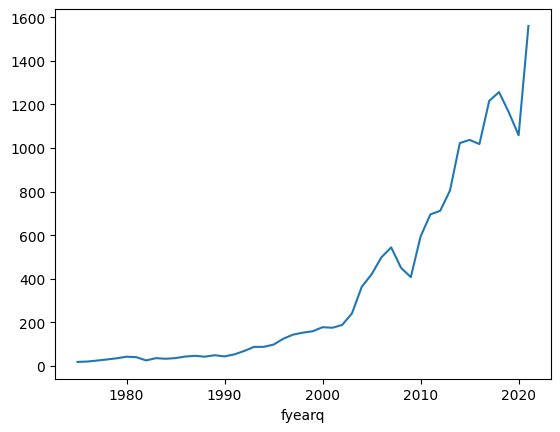

In [16]:
df.groupby('fyearq')['market_cap'].median().plot()

In [27]:
import numpy as np
import pandas as pd

# Ensure the 'median_distance' column is created with the correct dtype
df['median_distance'] = np.where(df['fyr_change_dummy'] == 0, np.nan, df['median_distance'])

# Initialize variables to count instances with all empty and non-empty distances
num_instances_all_empty = 0
num_instances_non_empty = 0

# Initialize sets to store tickers with non-empty, empty, and mixed distances
non_empty_distances_tickers = set()
empty_distances_tickers = set()
mixed_distances_tickers = set()

# Filter rows where fiscal year change occurred
fyr_change_rows = df[df['fyr_change_dummy'] == 1]

# Iterate over rows where fiscal year change occurred
for index, fyr_change_row in fyr_change_rows.iterrows():
    # Determine if it's a quarterly or annual report
    is_quarterly_report = fyr_change_row['quarterly_report'] == 1

    # Filter similar market cap tickers excluding own ticker
    similar_cap_tickers = df[(df['market_cap'] >= fyr_change_row['lower_bound']) &
                             (df['market_cap'] <= fyr_change_row['upper_bound']) &
                             (df['tic'] != fyr_change_row['tic'])]

    # Determine relevant distance column and filter criteria
    distance_col = 'quarter_distance' if is_quarterly_report else 'annual_distance'
    year_col = 'fyearq'
    years = [fyr_change_row['fyearq'], fyr_change_row['fyearq'] + 1, fyr_change_row['fyearq'] - 1]

    # Extract distances
    distances = similar_cap_tickers[similar_cap_tickers[year_col].isin(years)][distance_col].dropna().apply(lambda x: pd.Timedelta(x).days)

    # Check if distances list is empty
    if distances.empty:
        num_instances_all_empty += 1
        if fyr_change_row['tic'] in non_empty_distances_tickers:
            mixed_distances_tickers.add(fyr_change_row['tic'])
        else:
            empty_distances_tickers.add(fyr_change_row['tic'])
    else:
        median_distance = distances.median()
        df.loc[index, 'median_distance'] = median_distance
        num_instances_non_empty += 1
        if fyr_change_row['tic'] in empty_distances_tickers:
            mixed_distances_tickers.add(fyr_change_row['tic'])
        else:
            non_empty_distances_tickers.add(fyr_change_row['tic'])

# Calculate counts for unique tickers
num_non_empty_distances_tickers = len(non_empty_distances_tickers - mixed_distances_tickers)
num_empty_distances_tickers = len(empty_distances_tickers - mixed_distances_tickers)
num_mixed_distances_tickers = len(mixed_distances_tickers)
num_unique_fyr_change_tickers = fyr_change_rows['tic'].nunique()

# Display the results
print(f"Number of instances with all empty distances: {num_instances_all_empty}")
print(f"Number of instances with non-empty distances: {num_instances_non_empty}")
print(f"Number of unique tickers with non-empty distances: {num_non_empty_distances_tickers}")
print(f"Number of unique tickers with all empty distances: {num_empty_distances_tickers}")
print(f"Number of unique tickers with mixed distances: {num_mixed_distances_tickers}")
print(f"Total number of unique tickers with fiscal year changes: {num_unique_fyr_change_tickers}")


Number of instances with all empty distances: 413
Number of instances with non-empty distances: 1775
Number of unique tickers with non-empty distances: 1568
Number of unique tickers with all empty distances: 363
Number of unique tickers with mixed distances: 47
Total number of unique tickers with fiscal year changes: 1978


In [29]:
num_changes = (df['fyr_change_dummy'] == 1).sum()

print("Number of changes:", num_changes)

Number of changes: 2188


#### Number of cases where 'fyr' change occured was 2188 in total. It includes the cases where one ticker might have several fyr changes throughout the period. 

#### Number of successfully calculated median distances was 1775, and 413 cases had empty distances 

In [30]:
1775 + 413

2188

#### In total, they match with the number of fyr changes

In [31]:
num_tickers_with_fyr_change = df[df['fyr_change_dummy'] == 1]['tic'].nunique()

print(f"Number of tickers with fyr_change_dummy equal to 1: {num_tickers_with_fyr_change}")


Number of tickers with fyr_change_dummy equal to 1: 1978


In [32]:
summary_stats = df['median_distance'].describe()
formatted_stats = summary_stats.apply(lambda x: f'{x:.2f}')

print(formatted_stats)

count    1775.00
mean       90.70
std         4.68
min        68.00
25%        90.00
50%        90.00
75%        91.00
max       132.00
Name: median_distance, dtype: object


In [33]:
filtered_df = df[df['fyr_change_dummy'] == 1]
print(filtered_df[['tic', 'rdq', 'fyr', 'fyearq', 'fqtr', 'fyr_change_dummy', 'diff', 'median_distance' ]].head())



        tic        rdq  fyr  fyearq  fqtr  fyr_change_dummy diff  \
22    0015B 1989-03-10    6    1989     1                 1  NaT   
58    0015B 1998-09-23    5    1998     1                 1  NaT   
646   0097A        NaT    3    1992     1                 1  NaT   
658   0097A        NaT   12    1995     1                 1  NaT   
1078  0147A        NaT    9    1997     1                 1  NaT   

      median_distance  
22                NaN  
58               91.0  
646              90.0  
658              90.0  
1078              NaN  


In [34]:
# Filter rows where fiscal year change occurred
fyr_change_rows = df[df['fyr_change_dummy'] == 1]

# Iterate over rows where fiscal year change occurred
for index, fyr_change_row in fyr_change_rows.iterrows():
    # Check if fiscal year change happened in quarterly or annual report
    is_quarterly_report = fyr_change_row['quarterly_report'] == 1

    # Determine which column to assign median distance
    median_distance_column = 'annual_median' if not is_quarterly_report else 'quarterly_median'

    # Update the median_distance column accordingly
    df.loc[index, median_distance_column] = fyr_change_row['median_distance']

# Set NaN for rows where fyr_change_dummy is 0
df.loc[df['fyr_change_dummy'] == 0, ['annual_median', 'quarterly_median']] = np.nan


In [37]:
annual_median_summary = df['annual_median'].describe()
print("Summary statistics for Annual Median:")
print(annual_median_summary)

quarterly_median_summary = df['quarterly_median'].describe()
print("\nSummary statistics for Quarterly Median:")
print(quarterly_median_summary)


Summary statistics for Annual Median:
count     55.000000
mean     115.036364
std        6.429716
min      101.000000
25%      112.000000
50%      116.000000
75%      119.000000
max      132.000000
Name: annual_median, dtype: float64

Summary statistics for Quarterly Median:
count    1720.000000
mean       89.923256
std         1.337335
min        68.000000
25%        90.000000
50%        90.000000
75%        91.000000
max        91.000000
Name: quarterly_median, dtype: float64
